# HUMAN ACTIVITY RECOGNITION MODEL

Welcome to my Notebook !!

UNDERSTANDING THE PROBLEM STATEMENT:
Here, we are building an automated model which will be able to classify various human activities based on the readings of accelerometer and gyroscope readings produced on 3 different axis (X, Y and Z).

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import itertools
import numpy as np

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train.head()

,label,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,7.0,137.0,73.0,180.0,137.0,78.0,182.0,138.0,85.0,185.0,...,125.0,86.0,73.0,125.0,86.0,73.0,126.0,86.0,74.0,127.0
1,2.0,115.0,114.0,118.0,127.0,125.0,122.0,128.0,133.0,138.0,...,77.0,103.0,124.0,134.0,137.0,139.0,144.0,139.0,131.0,122.0
2,2.0,171.0,141.0,108.0,104.0,115.0,127.0,124.0,121.0,124.0,...,190.0,192.0,163.0,123.0,97.0,84.0,80.0,81.0,80.0,68.0
3,3.0,140.0,140.0,149.0,166.0,183.0,203.0,219.0,228.0,232.0,...,123.0,122.0,123.0,123.0,124.0,125.0,124.0,122.0,121.0,121.0
4,3.0,215.0,203.0,193.0,184.0,177.0,173.0,175.0,178.0,178.0,...,84.0,58.0,45.0,54.0,65.0,71.0,76.0,82.0,88.0,94.0


# Variable Identification

Here, we will try to identify the Input data and the Target Variable(Output Data) and their data-types.

In [116]:
# getting column names of variables
train.columns

Index(['label', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1191', '1192', '1193', '1194', '1195', '1196', '1197', '1198', '1199',
       '1200'],
      dtype='object', length=1201)

In [117]:
# getting data-types
print("Data Types of the columns are:\n\n", train.dtypes)

Data Types of the columns are:

 label    float64
1        float64
2        float64
3        float64
4        float64
          ...   
1196     float64
1197     float64
1198     float64
1199     float64
1200     float64
Length: 1201, dtype: object


In [5]:
# shape of the dataset
print(train.shape)
print(test.shape)

(8000, 1201)
(435, 1201)


Shape of the train dataset is :
 (8000, 1201)
There are 8000 rows and 1201 columns in the dataset.

As, we can clearly see that this is a Classification Problem where we have to predict human activities based on the readings of accelerometer and gyroscope readings produced on 3 different axis (X, Y and Z). Since there are more than two classes hence this is a Multi-class Classification Problem.

HYPOTHESIS GENERATION
Now, after carefully studing the problem and looking at the variable/column fetaures in the dataset, we can come up with some of our own assumptions/hypothesis. It is basically thinking of the features that might affect the output though our assumption may or may not be always correct in reality.

Here we are assuming that the mean acceleration readings are there by present in the 100th column of the train dataset. We will further work on this column.

# Data Cleaning

Checking train and test data for duplicate entries

In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 605
No of duplicates in test : 0


Removing the duplicates

In [7]:
train.drop_duplicates(keep = "first", inplace = True)
print(len(train))
print(train.shape)

7395
(7395, 1201)


Checking for Nan / Null values

In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


creating X_train and Y_train for visulaization as well as model building

In [9]:
X_train = train.drop(['label'], axis=1)
y_train = train.label

In [10]:
X_test = test.drop(['label'], axis=1)
y_test = test.label

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7395, 1200)
(435, 1200)
(7395,)
(435,)


# DATA VISUALIZATION

In [12]:
train.groupby(['label'], sort=False).size().reset_index(name='Count')

,label,Count
0,7.0,736
1,2.0,947
2,3.0,1006
3,5.0,1018
4,9.0,721
5,0.0,984
6,6.0,1005
7,4.0,978


Checking for imbalanced data

/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


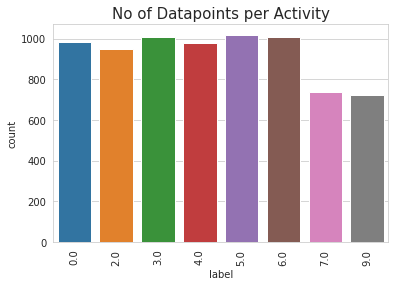

In [13]:
# Let's check number of observations per label
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.label)
plt.xticks(rotation=90)
plt.show()

DIFFERENTIATING BETWEEN STATIONARY AND MOVING ACTIVITIES ON THE BASIS OF OUR ASSUMPTION

In [14]:
# Taking datapoint of each activity to a different Dataframe
df1 = train[train['label'] == 0.0]
df2 = train[train['label'] == 2.0]
df3 = train[train['label'] == 3.0]
df4 = train[train['label'] == 4.0]
df5 = train[train['label'] == 5.0]
df6 = train[train['label'] == 6.0]
df7 = train[train['label'] == 7.0]
df8 = train[train['label'] == 9.0]

/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level functi

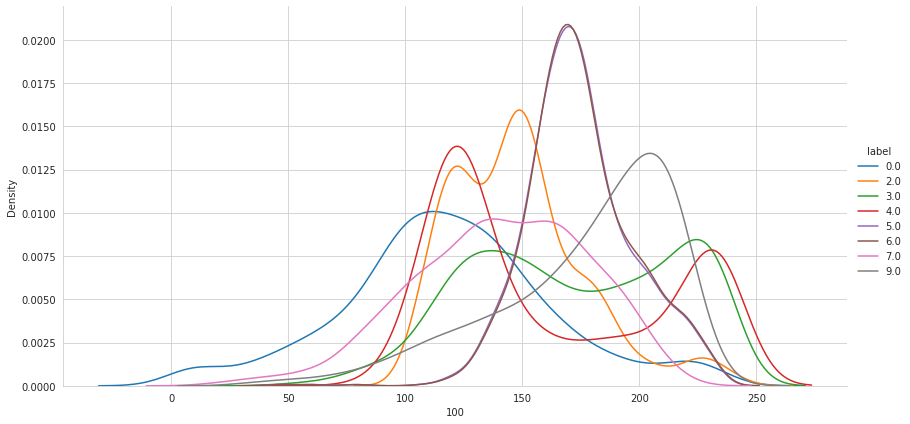

In [42]:
# Let's see how we can differentiate the same using plots

facetgrid = sns.FacetGrid(data=train, hue='label', size=6, aspect=2)
facetgrid.map(sns.distplot, '100', hist=False).add_legend()

plt.annotate("Static Activities", xy=(-0.97,15), xytext=(-0.6, 20), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.2"))

plt.annotate("Dynamic Activities", xy=(-0.1,3), xytext=(0.3, 8), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.2"))

plt.show()

/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function 

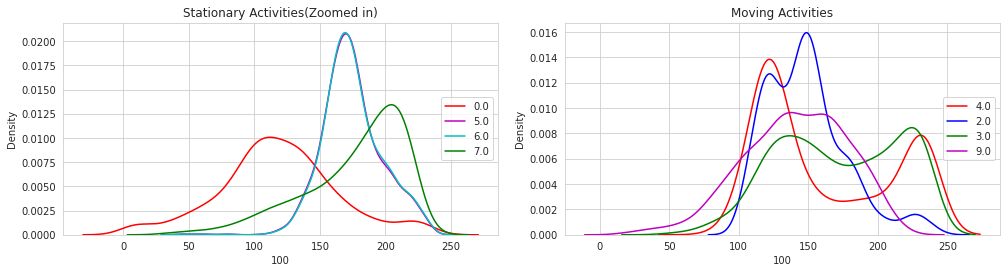

In [47]:
# Plotting each dataframe

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df1['100'],color = 'r',hist = False, label = '0.0')
sns.distplot(df5['100'],color = 'm',hist = False,label = '5.0')
sns.distplot(df6['100'],color = 'c',hist = False, label = '6.0')
sns.distplot(df8['100'],color = 'g',hist = False, label = '7.0')
#plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center right')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df4['100'],color = 'red',hist = False, label = '4.0')
sns.distplot(df2['100'],color = 'blue',hist = False,label = '2.0')
sns.distplot(df3['100'],color = 'green',hist = False, label = '3.0')
sns.distplot(df7['100'],color = 'm',hist = False, label = '9.0')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

# MODEL BUILDING

In [15]:
# giving our own label name
labels=['0','1','2','3','4','5','6','7']

## Let's define some generic functions to create ML models

In [16]:
# creating confusion matrix function
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [17]:
# Generic function to any model
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    
    # PLotting classification report
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Printing Grid Search Attributes

In [18]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [19]:
# Importing necessary libraries
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## Applying various Machine learning model with Grid-Search

# 1. SVM(linear)

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/skle

Done 
 

training_time(HH:MM:SS.ms) - 0:17:51.293614


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.043829


---------------------
|      Accuracy      |
---------------------

    0.6551724137931034


--------------------
| Confusion Matrix |
--------------------

 [[49  0  0  0  0  0  1  0]
 [ 0 46  0  0  0  0  0  0]
 [ 0  1  4  6  6 27  6  0]
 [ 0  0  3 23 19 10  8  0]
 [ 0  0  2  6 21 17  5  0]
 [ 0  0  3  5  5 46  5  0]
 [ 0  0  0  0  0  0 41  3]
 [ 0  0  0  0  0  0 12 55]]


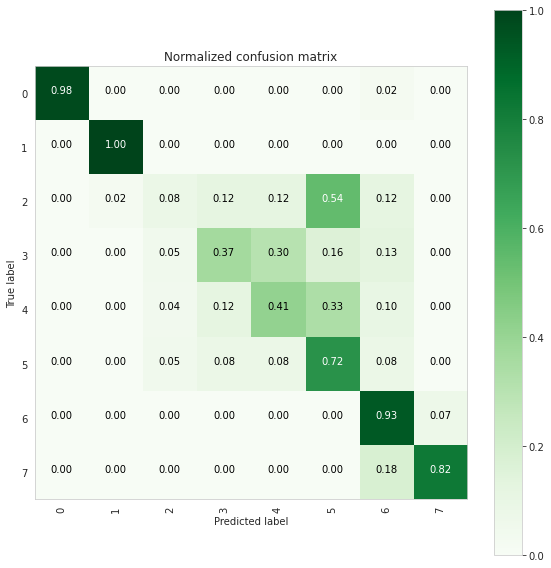

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         2.0       0.98      1.00      0.99        46
         3.0       0.33      0.08      0.13        50
         4.0       0.57      0.37      0.45        63
         5.0       0.41      0.41      0.41        51
         6.0       0.46      0.72      0.56        64
         7.0       0.53      0.93      0.67        44
         9.0       0.95      0.82      0.88        67

    accuracy                           0.66       435
   macro avg       0.65      0.66      0.63       435
weighted avg       0.66      0.66      0.63       435



In [21]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [22]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.125, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.6425963488843813



# 2. SVM(kernel)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:36:47.774619


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.384212


---------------------
|      Accuracy      |
---------------------

    0.296551724137931


--------------------
| Confusion Matrix |
--------------------

 [[ 0  0  0  0 50  0  0  0]
 [ 0  9  0  0 37  0  0  0]
 [ 0  0  0  0 50  0  0  0]
 [ 0  0  0  0 63  0  0  0]
 [ 0  0  0  0 51  0  0  0]
 [ 0  0  0  0 64  0  0  0]
 [ 0  0  0  0 14  0 30  0]
 [ 0  0  0  0 28  0  0 39]]


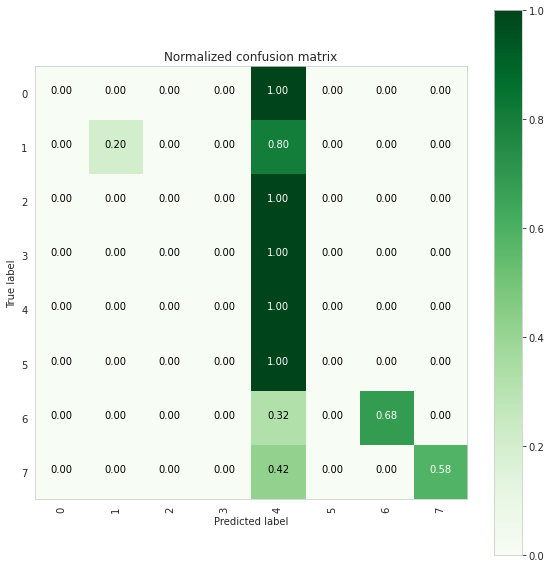

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         2.0       1.00      0.20      0.33        46
         3.0       0.00      0.00      0.00        50
         4.0       0.00      0.00      0.00        63
         5.0       0.14      1.00      0.25        51
         6.0       0.00      0.00      0.00        64
         7.0       1.00      0.68      0.81        44
         9.0       1.00      0.58      0.74        67

    accuracy                           0.30       435
   macro avg       0.39      0.31      0.27       435
weighted avg       0.38      0.30      0.26       435



/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/graylyrapier/Desktop/Challenges/neuroequilibrium/localenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

In [23]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [25]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=2, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 2, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.13766058147396892



# 3. Random Forest

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:14:54.568508


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.118168


---------------------
|      Accuracy      |
---------------------

    0.9517241379310345


--------------------
| Confusion Matrix |
--------------------

 [[50  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0]
 [ 0  0  4 59  0  0  0  0]
 [ 0  0  0  0 45  6  0  0]
 [ 0  0  0  0  6 58  0  0]
 [ 0  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  0  4 63]]


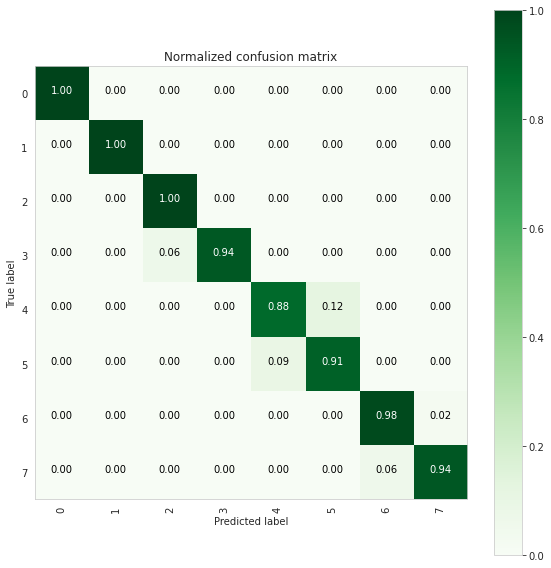

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         2.0       1.00      1.00      1.00        46
         3.0       0.93      1.00      0.96        50
         4.0       1.00      0.94      0.97        63
         5.0       0.88      0.88      0.88        51
         6.0       0.91      0.91      0.91        64
         7.0       0.91      0.98      0.95        44
         9.0       0.98      0.94      0.96        67

    accuracy                           0.95       435
   macro avg       0.95      0.96      0.95       435
weighted avg       0.95      0.95      0.95       435

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=13, n_estimators=170)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 1

In [24]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=8)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

In [26]:
print_grid_search_attributes(rfc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=13, n_estimators=170)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 13, 'n_estimators': 170}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9491548343475321



# Comparing the Accuracy of ML models

In [118]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))
print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Linear SVC          : 64.26%       35.74% 
rbf SVM classifier  : 13.77%      86.23% 
Random Forest       : 94.92%      5.085% 


## --------------------------------------------------------------------------------------------------------------

# Creating Deep Learning model

In [37]:
# importing the libraries
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [38]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [55]:
print(X_train.to_numpy().shape)
print(np.reshape(X_train.to_numpy(), (7395, 400,3)).shape)
X_train=np.reshape(X_train.to_numpy(), (7395, 400,3))
X_test=np.reshape(X_test.to_numpy(), (435, 400,3))
y_train=pd.get_dummies(y_train).to_numpy()
y_test=pd.get_dummies(y_test).to_numpy()

(7395, 1200)
(7395, 400, 3)


In [59]:
# Initializing parameters
epochs = 100
batch_size = 16
n_hidden = 12
n_classes=8


In [58]:
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [63]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/home/graylyrapier/Desktop/Challenges/neuroequilibrium/Assignment ML/mymodel.h5',  # model filename
                             monitor='val_accuracy', # quantity to monitor
                             verbose=1, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [65]:
X_train=np.reshape(X_train, (7395, 20,20,3))
X_test=np.reshape(X_test, (435, 20,20,3))

In [71]:
y_train.shape

(7395, 8)

In [66]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(n_hidden,(7,7),activation='relu',strides=(1, 1),input_shape=(20,20, 3),padding='same'),
                                  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(124,activation='relu'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(n_classes,activation='softmax')
                                  ])

In [67]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 12)        1776      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 124)               148924    
_________________________________________________________________
dropout_1 (Dropout)          (None, 124)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1000      
Total params: 151,700
Trainable params: 151,700
Non-trainable params: 0
________________________________________________

In [73]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#history1=model.fit(X_train,y_train,validation_split=0.125,callbacks=[checkpoint],epochs=500,batch_size=128,verbose=2)
history1=model.fit(X_train,
          y_train,
          batch_size=batch_size,
          callbacks=[checkpoint],
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/100
463/463 [==============================] - 6s 12ms/step - loss: 0.3021 - accuracy: 0.9055 - val_loss: 0.3720 - val_accuracy: 0.8874

Epoch 00001: val_accuracy did not improve from 0.94943
Epoch 2/100
463/463 [==============================] - 5s 10ms/step - loss: 0.3321 - accuracy: 0.8972 - val_loss: 0.1612 - val_accuracy: 0.9448

Epoch 00002: val_accuracy did not improve from 0.94943
Epoch 3/100
463/463 [==============================] - 4s 10ms/step - loss: 0.2850 - accuracy: 0.9029 - val_loss: 0.1830 - val_accuracy: 0.9448

Epoch 00003: val_accuracy did not improve from 0.94943
Epoch 4/100
463/463 [==============================] - 5s 10ms/step - loss: 0.2962 - accuracy: 0.9063 - val_loss: 0.1621 - val_accuracy: 0.9471

Epoch 00004: val_accuracy did not improve from 0.94943
Epoch 5/100
463/463 [==============================] - 4s 10ms/step - loss: 0.2910 - accuracy: 0.9041 - val_loss: 0.1962 - val_accuracy: 0.9494

Epoch 00005: val_accuracy did not improve from 0.94943


# PLOTTING THE TRAINING AND TEST CURVE

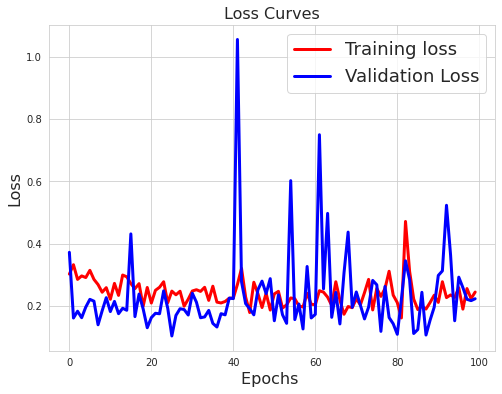

In [74]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.savefig('/home/graylyrapier/Desktop/Challenges/neuroequilibrium/Assignment ML/loss.png') 

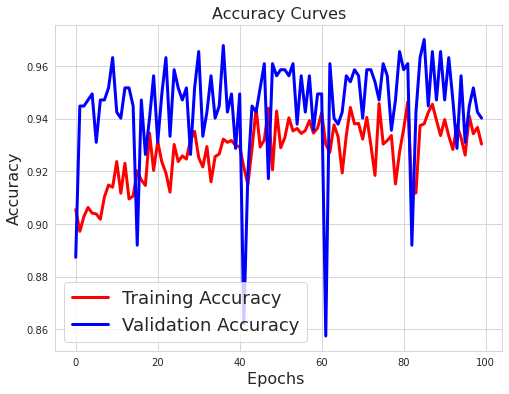

In [75]:
# Accuracy Curve
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.savefig('/home/graylyrapier/Desktop/Challenges/neuroequilibrium/Assignment ML/accuracy.png') 

# CONCLUSION

From our inference we can say that random forest and the CNN model created by us are the more efficient than others and have been able to achieve nearly 95 percent accuracy on test data

Random forest is better because:

1. While growing the trees, the random forest adds more randomness to the model. When splitting a node, it looks for the best feature from a random subset of features rather than the most essential feature. As a result, there is a lot of variety, which leads to a better model.

2. As a result, in random forest, the technique for splitting a node only considers a random subset of the features. Instead of searching for the greatest possible thresholds, we make trees even more random by employing random thresholds for each feature (like a normal decision tree does) thus achieving a higher accuracy.

Convolution Neural Network is better because:

1. A CNN combines learned features with incoming data and employs 2D convolutional layers, making it well-suited to 2D data processing. Because CNNs do not require manual feature extraction, there is no requirement to select features to classify the target variables. CNNs work by directly extracting features, and the key features aren't pre-trained; they're learned as the network trains. CNNs are well-suited and accurate for classification challenges because of its automated feature extraction.